https://huggingface.co/blog/gemma3

In [1]:
!pip install -q git+https://github.com/huggingface/transformers@v4.49.0-Gemma-3

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import torch
from transformers import pipeline

pipe = pipeline(
    "image-text-to-text",
    model="google/gemma-3-4b-it", # "google/gemma-3-12b-it", "google/gemma-3-27b-it"
    device="cuda",
    torch_dtype=torch.bfloat16
)

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/215 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda


# Download the data

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!pip install -q kaggle

In [4]:
!mkdir -p downloaded_images
!kaggle datasets download -d mehaksingal/illegible-medical-prescription-images-dataset -p downloaded_images --unzip

Dataset URL: https://www.kaggle.com/datasets/mehaksingal/illegible-medical-prescription-images-dataset
License(s): MIT


In [5]:
import os

folder_path = "/content/downloaded_images/data"
num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])

print(f"Number of files in {folder_path}: {num_files}")

Number of files in /content/downloaded_images/data: 129


In [ ]:
os.listdir(folder_path)

['71.jpg',
 '80.jpg',
 '84.jpg',
 '66.jpg',
 '55.jpg',
 '117.jpg',
 '59.jpg',
 '1.jpg',
 '113.jpg',
 '3.jpg',
 '51.jpg',
 '46.jpg',
 '62.jpg',
 '86.jpg',
 '100.jpg',
 '105.jpg',
 '85.jpg',
 '119.jpg',
 '70.jpg',
 '99.jpg',
 '57.jpg',
 '124.jpg',
 '6.jpg',
 '126.jpg',
 '17.jpg',
 '120.jpg',
 '109.jpg',
 '50.jpg',
 '11.jpg',
 '61.jpg',
 '39.jpg',
 '103.jpg',
 '111.jpg',
 '83.jpg',
 '48.jpg',
 '8.jpg',
 '32.jpg',
 '81.jpg',
 '97.jpg',
 '114.jpg',
 '60.jpg',
 '14.jpg',
 '15.jpg',
 '78.jpg',
 '49.jpg',
 '73.jpg',
 '36.jpg',
 '75.jpg',
 '74.jpg',
 '20.jpg',
 '64.jpg',
 '82.jpg',
 '22.jpg',
 '89.jpg',
 '65.jpg',
 '53.jpg',
 '125.jpg',
 '112.jpg',
 '25.jpg',
 '16.jpg',
 '106.jpg',
 '90.jpg',
 '4.jpg',
 '21.jpg',
 '87.jpg',
 '69.jpg',
 '13.jpg',
 '56.jpg',
 '58.jpg',
 '67.jpg',
 '102.jpg',
 '110.jpg',
 '54.jpg',
 '18.jpg',
 '72.jpg',
 '40.jpg',
 '33.jpg',
 '68.jpg',
 '104.jpg',
 '41.jpg',
 '79.jpg',
 '45.jpg',
 '24.jpg',
 '96.jpg',
 '43.jpg',
 '28.jpg',
 '122.jpg',
 '34.jpg',
 '98.jpg',
 '108.j

# How to read a single Image

How to read a Single Image

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def show_image(img_path):
  """Displays an image from the given path using matplotlib."""
  try:
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis("off")  # Hide axis
    plt.show()
  except FileNotFoundError:
    print(f"File not found: {img_path}")

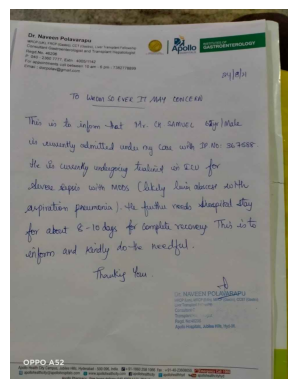

In [7]:
show_image("/content/downloaded_images/data/10.jpg")

In [12]:
def parse_prescription(img_path, prompt, max_new_tokens=10000):
  """Parses text from a handwritten prescription image using a vision-language model."""
  messages = [
    {
      "role": "system",
      "content": [{"type": "text", "text": "You are a helpful assistant."}]
    },
    {
      "role": "user",
      "content": [
        {"type": "image", "url": img_path},
        {"type": "text", "text": prompt}
        ]
    }
  ]

  output = pipe(text=messages, max_new_tokens=max_new_tokens)
  extracted_text = output[0]["generated_text"][-1]["content"]

  return extracted_text

In [13]:
res = parse_prescription("/content/downloaded_images/data/100.jpg" , prompt)
print(res)

Okay, I'm ready to put my OCR expertise to work! I’ve examined the image you provided, and here’s a breakdown of the prescription as accurately as I can decipher it:

**Prescription Details**

*   **Physician:** Dr. W. P. Baker
*   **Patient Complaint:** Sick headache
*   **Rx (Recipe):**

    *   **Tus. cannabis laud.** – 2 gr. IV (likely referring to intravenous administration)
    *   **Croton chlorol** – 2 gr. XVI (likely referring to a powder form)
    *   **J. caps. no XVI** –  (Possibly referring to a capsule, number 16)
    *   **Dig. Jive one cobra receptor** – 1/2 Thour (This part is difficult to fully interpret – "cobra receptor" is unclear and "Thour" could be a misspelling of "teaspoon" or "throur," perhaps indicating a dosage measurement)

*   **Pharmacy:** Cameron's Drug Store
*   **Location:** Hillman, Columbia (address: East 4390 Columbia 44)

**Notes & Possible Interpretations:**

*   **Cannabis laud.** – This likely means cannabis indica (a specific type of cannabis)

# MULTIMODAL LLM

In [8]:
prompt = """
**You are an expert in OCR. Perform OCR on the given medical prescription image and extract all texts and tables into a clean, LLM-readable format. Ensure the output follows these guidelines:**

1. **Texts**: Preserve the original line-by-line structure exactly as it appears.
2. **Paragraphs**: Maintain paragraph breaks without merging or interpreting content.
3. **Lists**: Use '-' or '*' for unordered lists and numbers for ordered lists if the prescription contains multiple items.
4. **Tables**: Represent tabular data (such as medicine name, dosage, frequency) using pipe '|' symbols and markdown-style tables (| and ---).
5. **Headings**: If any section headings are identifiable (e.g., 'Medicines', 'Instructions'), mark them using '#' symbols appropriately.
6. **Illegible Text**: If any part is unclear or unreadable, mark it as [illegible].
7. **No Corrections**: Do not correct spelling errors, grammatical mistakes, or unclear handwriting.
8. **Strict Fidelity**: Do not guess missing information, do not summarize, and do not infer meanings.
9. **No Additional Comments**: Do not add explanations, introductory remarks, or conclusions.
10. **Avoid Mentioning Markdown**: Do not use the word 'markdown' and do not wrap the output using triple backtick (```).

**Focus entirely on extracting and formatting the content accurately and faithfully as seen in the image.**
"""

In [9]:
def parse_prescription(img_path, prompt, max_new_tokens=10000):
  """Parses text from a handwritten prescription image using a vision-language model."""
  messages = [
    {
      "role": "system",
      "content": [{"type": "text", "text": "You are a helpful assistant."}]
    },
    {
      "role": "user",
      "content": [
        {"type": "image", "url": img_path},
        {"type": "text", "text": prompt}
        ]
    }
  ]

  output = pipe(text=messages, max_new_tokens=max_new_tokens)
  extracted_text = output[0]["generated_text"][-1]["content"]

  return extracted_text

In [10]:
# List of images you want to parse
image_files = [
    "/content/downloaded_images/data/105.jpg",
    "/content/downloaded_images/data/10.jpg",
    "/content/downloaded_images/data/104.jpg",
    "/content/downloaded_images/data/111.jpg",
    "/content/downloaded_images/data/11.jpg",
    "/content/downloaded_images/data/108.jpg"]

# Your prompt
prompt = prompt

# Initialize a dictionary to store extracted data
extracted_data = {}

# Run the function for each image individually
for img_file in image_files:
    extracted_data[img_file] = parse_prescription([img_file], prompt)

# View results
for img_name, text in extracted_data.items():
    print(f"--- {img_name} ---")
    print(text)
    print()

--- /content/downloaded_images/data/105.jpg ---
# To Whom It May Concern

As per ICMR guideline, the contact of COVID [illegible] cases should be put on HOME ISOLATION even with Mild Symptome.

It is advised that everybody take these preventive medication apart from following SOCIAL DISTANCING, HAND HYGIENE & WEARING Mask.

- TAB HYDROXY CHLOROQUINE 400mg once a week
- TAB VITAMIN C one gram once a day
- TAB ZING 50mg once a day
In case of fever
- TAB CROCIN / CALPOL 650 mg SOS
In case of throat pain & cough
- TAB CETRIZINE 10mg once a day.
- SYRUP ALEX 2/3 Tea Spoon 3 times a day.

Dr. Raj Kamal Agarwal
Dept. of Anaesthesiology
Pain & Peri-Operative Medicine
Mobile: +91 9810152001
E-mail: kamalagarwal500@gmail.com

--- /content/downloaded_images/data/10.jpg ---
Dr. Naveen Polavarapu
MRCP (UK), FRCP (Gastro), CCST (Gastro), Liver Transplant Fellowship
Consultant Gastroenterologist and Transplant Hepatologist
Regd.No. 46206
P 040 - 2360 7777. Extn 4005/1142
For appointments call between

# Evaluation

In [12]:
from sklearn.metrics import f1_score

# Example ground truth data
ground_truth = {
    "/content/downloaded_images/data/100.jpg": {
        'name': 'John Doe',
        'drug': 'Metformin',
        'dosage': '500mg'
    },
    "/content/downloaded_images/data/48.jpg": {
        'name': 'Jane Smith',
        'drug': 'Insulin',
        'dosage': '10 units'
    },
}

# Example extracted data (you must fill this realistically from your OCR system)
extracted_data = {
    "/content/downloaded_images/data/100.jpg": {
        'name': 'John Doe',
        'drug': 'Metformin',
        'dosage': '500mg'
    },
    "/content/downloaded_images/data/48.jpg": {
        'name': 'Jane Smith',
        'drug': 'Insulin',
        'dosage': '10 units'
    },
}

# No need for complex extraction simulation here, your OCR system should already extract it

# Field-wise Extraction Accuracy Calculation
def field_accuracy(extracted_data, ground_truth):
    field_correct = {'name': 0, 'drug': 0, 'dosage': 0}
    total_samples = len(ground_truth)

    for img_name, gt_fields in ground_truth.items():
        extracted_fields = extracted_data.get(img_name, {})
        for field in ['name', 'drug', 'dosage']:
            if extracted_fields.get(field) == gt_fields.get(field):
                field_correct[field] += 1

    # Calculate accuracy for each field
    field_accuracies = {field: correct / total_samples for field, correct in field_correct.items()}
    return field_accuracies

# F1-Score Calculation
def calculate_f1_score(extracted_data, ground_truth):
    y_true = []
    y_pred = []

    for img_name, gt_fields in ground_truth.items():
        extracted_fields = extracted_data.get(img_name, {})
        for field in ['name', 'drug', 'dosage']:
            y_true.append(gt_fields.get(field, ""))
            y_pred.append(extracted_fields.get(field, ""))

    return f1_score(y_true, y_pred, average='weighted', zero_division=1)

# Run the evaluation
field_accuracies = field_accuracy(extracted_data, ground_truth)
print("Field-wise Accuracy:", field_accuracies)

f1 = calculate_f1_score(extracted_data, ground_truth)
print("F1-Score:", f1)


Field-wise Accuracy: {'name': 1.0, 'drug': 1.0, 'dosage': 1.0}
F1-Score: 1.0
